PROBLEM STATEMENT

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [58]:
train_data=pd.read_csv("Train.csv")
test_data=pd.read_csv("Test.csv")

In [59]:
#combining train_data and test_data
train_data['source']='train'
test_data['source']='test'

In [60]:
data=pd.concat([train_data,test_data],ignore_index=True)

In [61]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [62]:
data.shape

(14204, 13)

In [63]:
train_data.shape

(8523, 13)

In [64]:
test_data.shape

(5681, 12)

In [65]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [66]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'source'],
      dtype='object')

In [67]:
data['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

 Exploratory data analysis

In [68]:
#check the missing values
data.apply(lambda x:sum(x.isnull()))

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [69]:
#fill the missing values
data.Item_Weight = data.Item_Weight.fillna(data.Item_Weight.mean())


In [70]:
data['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [71]:
data.Outlet_Size = data.Outlet_Size.fillna('medium')

In [72]:
data.Item_Outlet_Sales = data.Item_Outlet_Sales.fillna(data.Item_Outlet_Sales.mean())

In [73]:
data.apply(lambda x:sum(x.isnull()))

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
source                       0
dtype: int64

In [74]:
data['Item_Identifier'].head()

0    FDA15
1    DRC01
2    FDN15
3    FDX07
4    NCD19
Name: Item_Identifier, dtype: object

In [75]:
data['Item_type_combined']=data['Item_Identifier'].apply(lambda x:x[0:2])
data['Item_type_combined']=data['Item_type_combined'].map({'FD':'Food','NC':'Non consumable','DR':'Drink'})
data['Item_type_combined'].value_counts()

Food              10201
Non consumable     2686
Drink              1317
Name: Item_type_combined, dtype: int64

In [76]:
data['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [77]:
data['Item_Fat_Content']=data['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
data['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

Univariate analysis

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

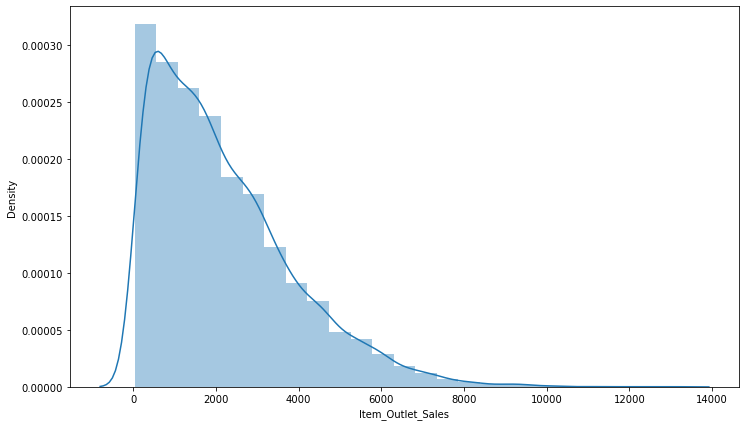

In [78]:
#Item_Outlet_Sales 
plt.figure(figsize=(12,7))
sns.distplot(train_data.Item_Outlet_Sales ,bins=25)

In [79]:
print(train_data.Item_Outlet_Sales.skew())
print(train_data.Item_Outlet_Sales.kurt())

1.1775306028542796
1.6158766814287264


Item_Outlet_Sales is skewed towards right so we need to normalize.

In [80]:
#numerical predictors
numerical_features=train_data.select_dtypes(include=[np.number])
numerical_features


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.300,0.016047,249.8092,1999,3735.1380
1,5.920,0.019278,48.2692,2009,443.4228
2,17.500,0.016760,141.6180,1999,2097.2700
3,19.200,0.000000,182.0950,1998,732.3800
4,8.930,0.000000,53.8614,1987,994.7052
...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834
8519,8.380,0.046982,108.1570,2002,549.2850
8520,10.600,0.035186,85.1224,2004,1193.1136
8521,7.210,0.145221,103.1332,2009,1845.5976


In [81]:
numerical_features.dtypes

Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
dtype: object

Out of the 12 variables 5 are numerical variables

In [82]:
#correlation between dependent variable and target variable
correlation=numerical_features.corr()
correlation

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


In [83]:
correlation['Item_Outlet_Sales'].sort_values(ascending=False)

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Item_Weight                  0.014123
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64

Item_MRP has the most postive correlation and Item_Visibility has the lowest correlation with the target variable

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

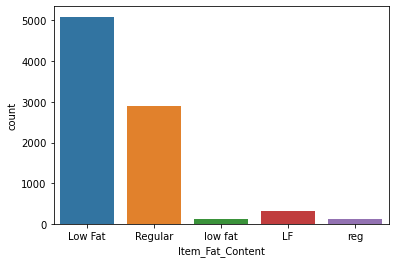

In [84]:
#Categorical variables
#Item_Fat_Content
sns.countplot(train_data.Item_Fat_Content)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Soft Drinks'),
  Text(2, 0, 'Meat'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Household'),
  Text(5, 0, 'Baking Goods'),
  Text(6, 0, 'Snack Foods'),
  Text(7, 0, 'Frozen Foods'),
  Text(8, 0, 'Breakfast'),
  Text(9, 0, 'Health and Hygiene'),
  Text(10, 0, 'Hard Drinks'),
  Text(11, 0, 'Canned'),
  Text(12, 0, 'Breads'),
  Text(13, 0, 'Starchy Foods'),
  Text(14, 0, 'Others'),
  Text(15, 0, 'Seafood')])

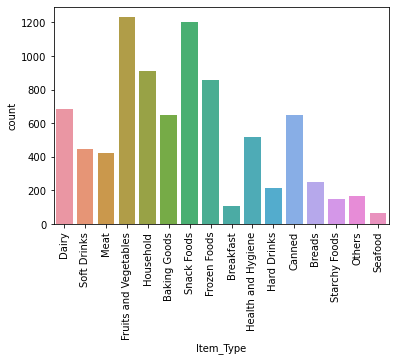

In [85]:
#Item_Type
sns.countplot(train_data.Item_Type)
plt.xticks(rotation=90)

There are 16 different types of unique values

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

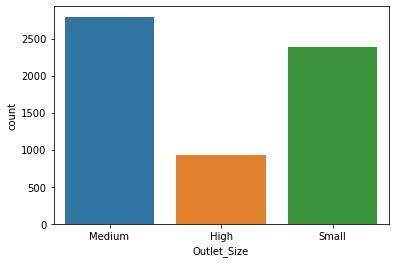

In [86]:
#Outlet_Size
sns.countplot(train_data.Outlet_Size)

There is only less number of sores having size 'high'

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

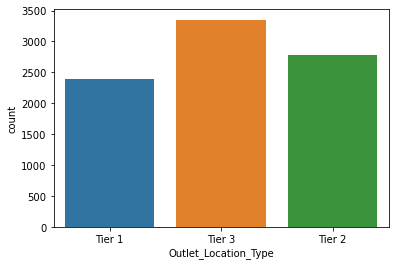

In [87]:
#Outlet_Location_Type
sns.countplot(train_data.Outlet_Location_Type)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Supermarket Type1'),
  Text(1, 0, 'Supermarket Type2'),
  Text(2, 0, 'Grocery Store'),
  Text(3, 0, 'Supermarket Type3')])

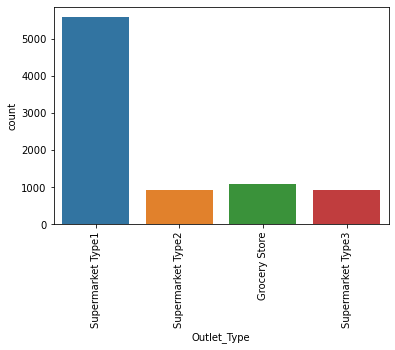

In [88]:
#Outlet_Type
sns.countplot(train_data.Outlet_Type)
plt.xticks(rotation=90)

Bivariate analysis

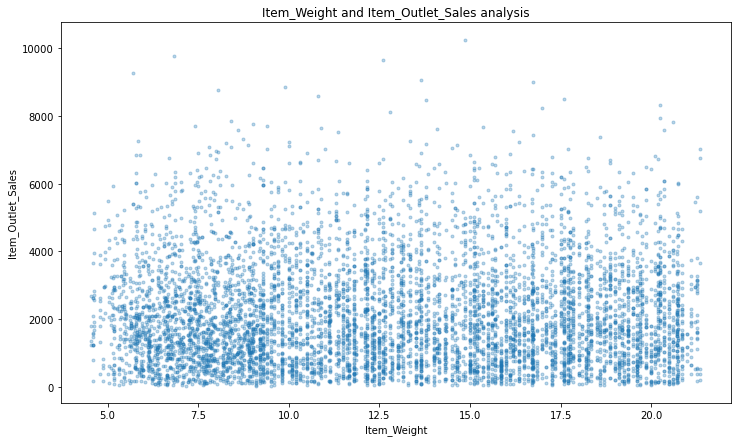

In [89]:
#Item_Weight and Item_Outlet_Sales analysis
plt.figure(figsize=(12,7))
plt.xlabel("Item_Weight")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Weight and Item_Outlet_Sales analysis")
plt.plot(train_data.Item_Weight,train_data["Item_Outlet_Sales"],'.',alpha=0.3)


Item_Weight has low correlation with Item_Outlet_Sales

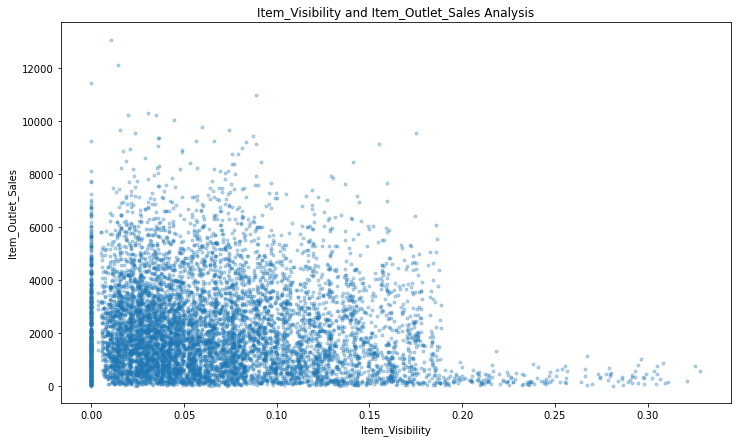

In [90]:
#Item_Visibility and Item_Outlet_Sales analysis
plt.figure(figsize=(12,7))
plt.xlabel("Item_Visibility")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Visibility and Item_Outlet_Sales Analysis")
plt.plot(train_data.Item_Visibility, train_data["Item_Outlet_Sales"],'.', alpha = 0.3)


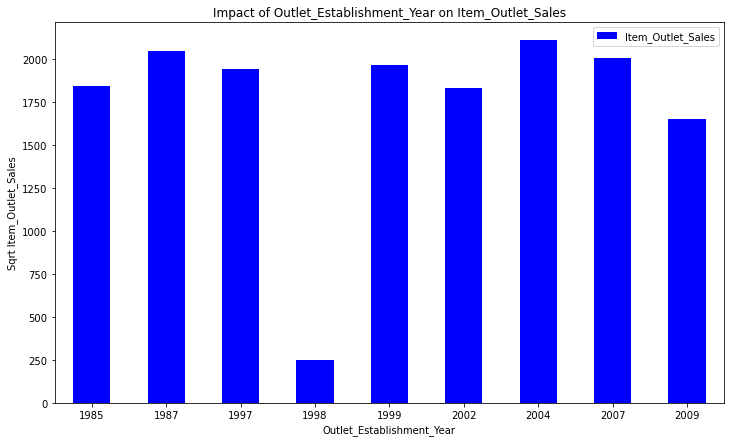

In [91]:
#Outlet_Establishment_Year and Item_Outlet_Sales analysis
Outlet_Establishment_Year_pivot = train_data.pivot_table(index='Outlet_Establishment_Year', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Establishment_Year_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Outlet_Establishment_Year")
plt.ylabel("Sqrt Item_Outlet_Sales")
plt.title("Impact of Outlet_Establishment_Year on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

In [92]:
#Impact of Item_Fat_Content on Item_Outlet_Sales
Item_Fat_Content_pivot= train_data.pivot_table(index='Item_Fat_Content',values='Item_Outlet_Sales',aggfunc=np.median)

In [93]:
Item_Fat_Content_pivot

,Item_Outlet_Sales
Item_Fat_Content,
LF,1797.6600
Low Fat,1765.7016
Regular,1845.5976
low fat,1614.2321
reg,1492.7236


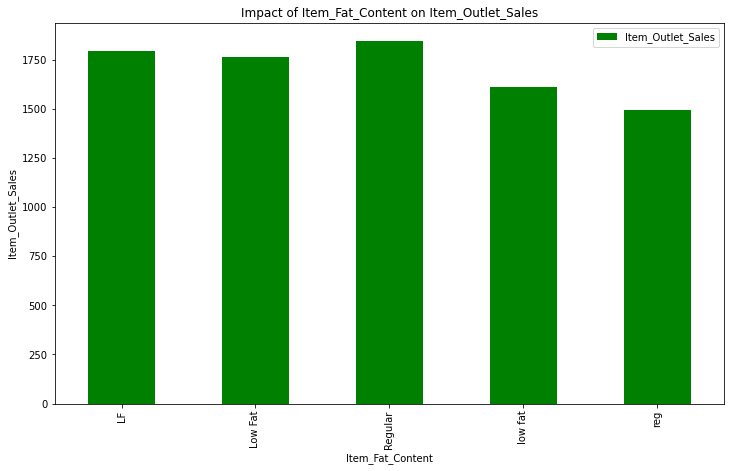

In [94]:
Item_Fat_Content_pivot.plot(kind='bar',color='green',figsize=(12,7))
plt.xlabel("Item_Fat_Content")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Fat_Content on Item_Outlet_Sales")
plt.show()                            

Low fat products have higher sales than regular products

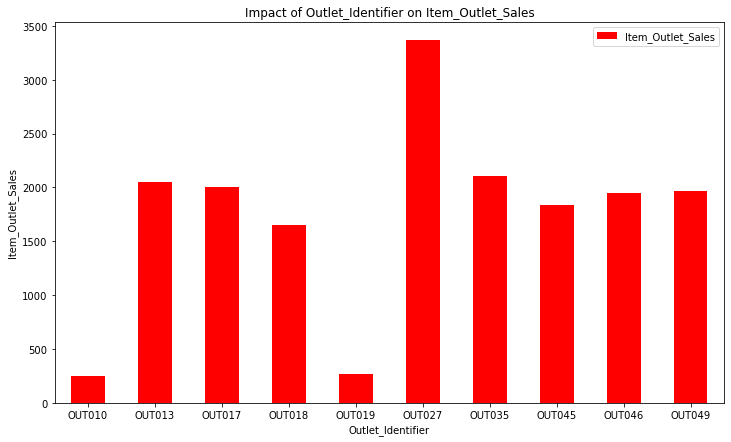

In [95]:
#Impact of Outlet_Identifier on Item_Outlet_Sales
Outlet_Identifier_pivot = train_data.pivot_table(index='Outlet_Identifier', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Identifier_pivot.plot(kind='bar', color='red',figsize=(12,7))
plt.xlabel("Outlet_Identifier")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Identifier on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

In [96]:
train_data.pivot_table(values='Outlet_Type',
                  columns='Outlet_Identifier',
                  aggfunc=lambda x:x.mode())

Outlet_Identifier,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type1,Supermarket Type2,Grocery Store,Supermarket Type3,Supermarket Type1,Supermarket Type1,Supermarket Type1,Supermarket Type1


In [97]:
train_data.pivot_table(values='Outlet_Type',
                  columns='Outlet_Size',
                  aggfunc=lambda x:x.mode())

Outlet_Size,High,Medium,Small
Outlet_Type,Supermarket Type1,Supermarket Type3,Supermarket Type1


Most of the stores are of Supermarket Type1 of size High and they do not have best results. whereas Supermarket Type3  is a Medium size store and have best results.

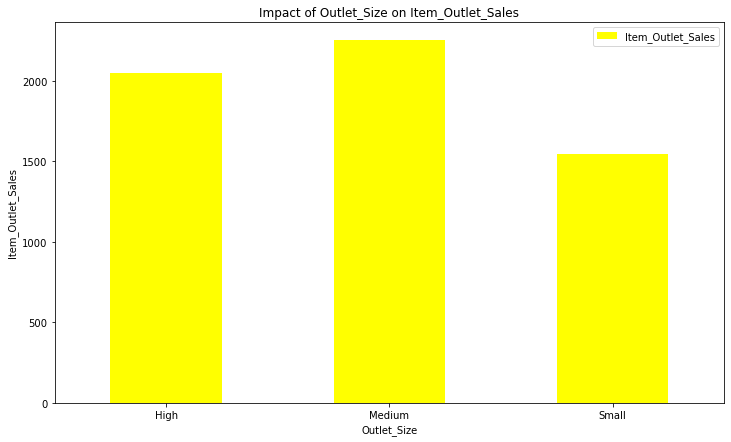

In [98]:
#Impact of Outlet_Size on Item_Outlet_Sales
Outlet_Size_pivot = train_data.pivot_table(index='Outlet_Size', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Size_pivot.plot(kind='bar', color='yellow',figsize=(12,7))

plt.xlabel("Outlet_Size")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Size on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

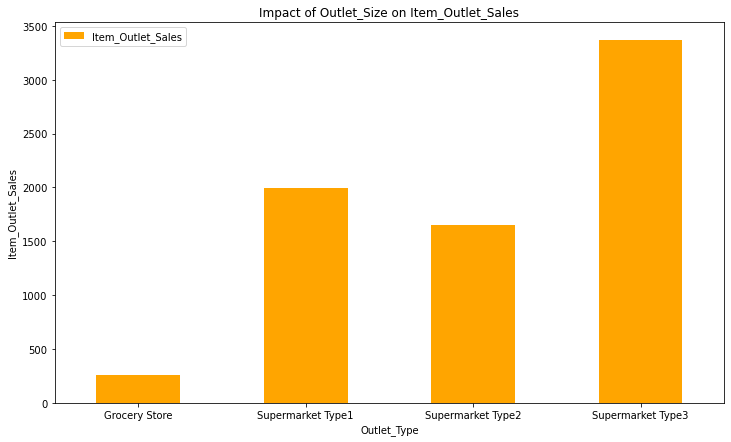

In [99]:
# Impact of Outlet_Type on Item_Outlet_Sales
Outlet_Type_pivot = train_data.pivot_table(index='Outlet_Type', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Type_pivot.plot(kind='bar', color='orange',figsize=(12,7))

plt.xlabel("Outlet_Type")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Size on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

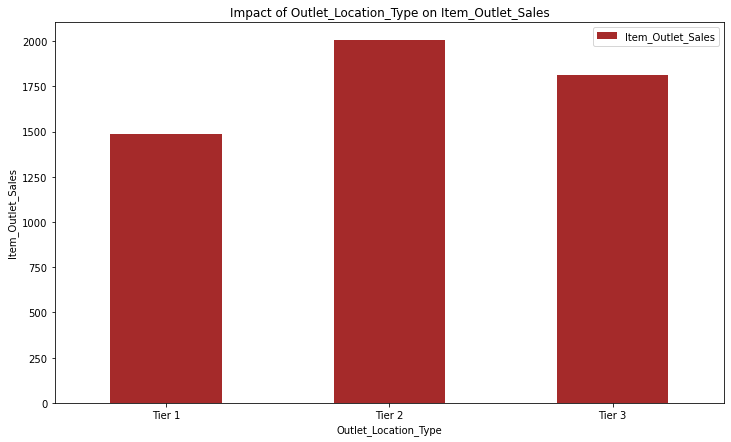

In [100]:
#Impact of Outlet_Location_Type on Item_Outlet_Sales
Outlet_Location_Type_pivot = train_data.pivot_table(index='Outlet_Location_Type', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Location_Type_pivot.plot(kind='bar', color='brown',figsize=(12,7))

plt.xlabel("Outlet_Location_Type")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Location_Type on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

Numerical and One-Hot Coding of Categorical variables

In [101]:
#Import library:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
#New variable for outlet
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_type_combined','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [102]:
#One Hot Coding:
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_type_combined','Outlet'])

In [103]:
data.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,source,Item_Fat_Content_0,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,3735.1380,train,1,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,443.4228,train,0,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,1999,2097.2700,train,1,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,732.3800,train,0,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.000000,Household,53.8614,OUT013,1987,994.7052,train,1,...,0,1,0,0,0,0,0,0,0,0


In [104]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
source                        object
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Size_3                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_type_combined_0           uint8
Item_type_combined_1           uint8
Item_type_combined_2           uint8
Outlet_0                       uint8
Outlet_1                       uint8
O

In [105]:
import warnings
warnings.filterwarnings('ignore')
#Drop the columns which have been converted to different types:
data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

#Divide into test and train:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

#Drop unnecessary columns:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

#Export files as modified versions:
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

In [106]:
# Reading modified data
train2 = pd.read_csv("train_modified.csv")
test2 = pd.read_csv("test_modified.csv")

In [107]:
train2.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.016047,249.8092,OUT049,3735.1380,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,0.019278,48.2692,OUT018,443.4228,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0.016760,141.6180,OUT049,2097.2700,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,0.000000,182.0950,OUT010,732.3800,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.000000,53.8614,OUT013,994.7052,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [108]:
X_train = train2.drop(['Item_Outlet_Sales', 'Outlet_Identifier','Item_Identifier'], axis=1)
y_train = train2.Item_Outlet_Sales

In [109]:
X_test = test2.drop(['Outlet_Identifier','Item_Identifier'], axis=1)

In [110]:
X_train.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,Outlet_Size_1,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,9.30,0.016047,249.8092,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,5.92,0.019278,48.2692,0,1,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
2,17.50,0.016760,141.6180,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,19.20,0.000000,182.0950,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,8.93,0.000000,53.8614,1,0,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0


In [111]:
y_train.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

Linear Regression

In [112]:
# Fitting Multiple Linear Regression to the training set
from sklearn.linear_model import  LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [113]:
# Predicting the test set results
y_pred = regressor.predict(X_test)
y_pred

array([1847.15910268, 1573.52276942, 1874.13419298, ..., 1808.73681713,
       3561.5386965 , 1263.79841883])

In [115]:
import warnings
warnings.filterwarnings('ignore')
# Measuring Accuracy
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score


In [116]:
lr_accuracy = round(regressor.score(X_train,y_train) * 100,2)
lr_accuracy

56.35

In [117]:
r2_score(y_train, regressor.predict(X_train))

0.5635180059745908

Decision Tree

In [120]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth=15,min_samples_leaf=300)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=15, min_samples_leaf=300)

In [121]:
# Predicting the test set results
y_pred = regressor.predict(X_test)
y_pred

array([1673.98398729, 1349.51290433,  471.30684669, ..., 1892.06614452,
       3805.94860417, 1349.51290433])

In [122]:
tree_accuracy = round(regressor.score(X_train,y_train),2)
tree_accuracy

0.59

In [123]:
r2_score(y_train, regressor.predict(X_train))

0.5884050821570486

Random Forest Model

In [125]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100,max_depth=6, min_samples_leaf=50,n_jobs=4)
regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, min_samples_leaf=50, n_jobs=4)

In [126]:
# Predicting the test set results
y_pred = regressor.predict(X_test)
y_pred

array([1655.7501108 , 1371.8205147 ,  597.98871884, ..., 1955.98379553,
       3682.69401472, 1315.64298681])

In [127]:
rf_accuracy = round(regressor.score(X_train,y_train),2)
rf_accuracy

0.61

In [128]:
r2_score(y_train, regressor.predict(X_train))

0.6125235016503581

Summary

The algorithm which performs the best in the application is the random forest model, which arranges the data and studies it for its variations. The results predicted will be very useful for the executives of the company to know about their sales and profits. This will also give them the idea for their new locations or centers of Bigmart.

